# FordGoBike System Data
## by Rachel Strate

## Preliminary Wrangling

This notebook explores the August 2019 FordGoBike System data.  

In [1]:
#Importing all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Reading in the dataset.
df = pd.read_csv('201908-baywheels-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


In [3]:
df.shape

(210563, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 14 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null object
end_time                   210563 non-null object
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 22.5+ MB


### What is the structure of your dataset?

The dataset has 210,563 entries and 14 features 
- duration in seconds
- start time
- end time
- start station id
- start station name
- start station latitude
- start station longitude
- end station id
- end station name
- end station latitude
- end station longitude
- bike id
- user type
- bike share

The datatypes include ints, strings and floats.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in exploring the following 3 questions:
1. When are most trips taken in terms of day of the week?
2. How long does the average trip take?
3. Do either of the above depend on if the user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The most useful features will be duration_sec, start_time, end_time, and user_type.

## Assessing

Some cleaning needs to occur in order to do the desired exploration.  The following quality issues are addressed in the code below. 
- The start time and end time are not in timedate format.
- A column for day of the week needs to be added.
- A column for minutes to be added in order for a duration unit that is more common.
- A column with the distance calculated from the latitude and longitude coordinates to be added.
- A column for time category to be added.

## Cleaning

#### Define
Change the data type of the start and end time to a timedate format.

#### Code

In [5]:
#Writing a function to change data types.
def dt_type (column):
    df[column] = pd.to_datetime(df[column])
    return 

In [6]:
dt_type('start_time')
dt_type('end_time')

#### Test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210563 entries, 0 to 210562
Data columns (total 14 columns):
duration_sec               210563 non-null int64
start_time                 210563 non-null datetime64[ns]
end_time                   210563 non-null datetime64[ns]
start_station_id           210563 non-null int64
start_station_name         210563 non-null object
start_station_latitude     210563 non-null float64
start_station_longitude    210563 non-null float64
end_station_id             210563 non-null int64
end_station_name           210563 non-null object
end_station_latitude       210563 non-null float64
end_station_longitude      210563 non-null float64
bike_id                    210563 non-null int64
user_type                  210563 non-null object
bike_share_for_all_trip    210563 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(4)
memory usage: 22.5+ MB


#### Define
Insert a new column for the day of the week. Using the timedate column start_date fill in the column with the correlating day of the week.

#### Code

In [8]:
#Inserting a column and setting the content to the day of the week. Remember 0 is Monday.
df.insert(3, 'day_of_week', df.start_time.dt.dayofweek)
df.head(3)

,duration_sec,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


#### Test

In [9]:
df.head(3)

,duration_sec,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No


#### Define
Insert a minutes column as duration in seconds isn't clear.

#### Code

In [10]:
df.insert(1, 'duration_min', df.duration_sec/60)

#### Test

In [11]:
df.head()

,duration_sec,duration_min,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No


#### Define
Adding a column with the distance calculated from the latitude and longitude coordinates.

#### Code

In [12]:
#Calculating distance.  Used code found in Udacity knowledge area.
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [13]:
df['distance'] = haversine(df['start_station_longitude'],
                          df['start_station_latitude'],
                          df['end_station_longitude'],
                          df['end_station_latitude'])

#### Test

In [14]:
df.head(1)

,duration_sec,duration_min,start_time,end_time,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.75,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.51727


In [15]:
df.distance.describe()

count    210563.000000
mean          1.673998
std           1.059922
min           0.000000
25%           0.930881
50%           1.444599
75%           2.188723
max          67.402478
Name: distance, dtype: float64

#### Define
Inserting a column for time categories (morning, afternoon, evening and latenight).  This column will be made for the start time only to be able to see at what point of the day do people rent bikes.

#### Code

In [16]:
#Inserting a new column.  Temporarily filling it with the start_time content.
df.insert(4, 'time_slot', df['start_time'])
df.head()

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,2019-08-31 21:27:42.253,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,2019-08-31 22:34:17.512,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,2019-08-31 22:34:49.942,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,2019-08-31 14:22:02.278,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,2019-08-31 18:47:08.057,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000


In [17]:
#Building a function to remove the hour from the datetime.
from datetime import datetime

def time_split(df, column):
    df[column] = df[column].apply(lambda x: datetime.strftime(x,'%H'))
    return df.head(5)

In [18]:
#Instantiating the function
time_split(df, 'time_slot')

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,21,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,22,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,22,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,14,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,18,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000


In [19]:
#Changing the column to an int data type.
df.time_slot = df.time_slot.astype(int)

In [20]:
#Using a lambda function to update the column with the time category.

col = ['time_slot']
for c in col:
    df['time_slot'] = df[c].apply(lambda x: 'morn' if x>5 and x<12 else 
                             'afternoon' if x>11 and x<18 else 
                             'evening' if x>17 and x<25 else 'late_night')

#### Test

In [21]:
df.head(10)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,afternoon,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,evening,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000
5,17193,286.550000,2019-08-31 20:52:40.744,2019-09-01 01:39:14.592,evening,5,49,S Park St at 3rd St,37.780760,-122.394989,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3503,Customer,No,1.071275
6,8959,149.316667,2019-08-31 22:44:38.213,2019-09-01 01:13:57.248,evening,5,323,Broadway at Kearny,37.798014,-122.405950,8,The Embarcadero at Vallejo St,37.799953,-122.398525,3028,Customer,No,0.686700
7,9528,158.800000,2019-08-31 22:04:15.446,2019-09-01 00:43:03.874,evening,5,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,1577,Customer,No,7.023709
8,9542,159.033333,2019-08-31 22:03:56.506,2019-09-01 00:42:59.328,evening,5,160,West Oakland BART Station,37.805318,-122.294837,237,Fruitvale BART Station,37.775232,-122.224498,2534,Customer,No,7.023709
9,4121,68.683333,2019-08-31 23:26:05.751,2019-09-01 00:34:46.893,evening,5,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,9651,Customer,No,0.224007


## Univariate Exploration

We start the exploration looking at the duration of the trips.  As we are looking at 3 different question we could have chosen any as the starting point so duration was randomly picked.

In [22]:
df.head(1)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.75,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.51727


In [23]:
#Grouping the rentals for ease of visualizing.  With count all of the columns are the same, so user_type was chosen
#to use for the total count.
rentals_per_day = df.groupby('day_of_week').user_type.count()

In [24]:
#Setting the counts to a variable.
day_counts = df.day_of_week.value_counts()
day_counts

3    39472
4    36420
2    32879
1    32529
0    31353
5    21365
6    16545
Name: day_of_week, dtype: int64

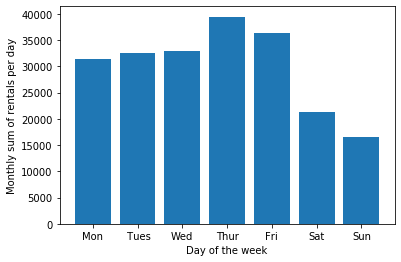

In [25]:
#As day of the week is qualitative a bar chart was used.

#Labels added for clarity to a reader.
days = ['Mon', ' Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

rentals_by_day = df.day_of_week.value_counts()
plt.bar(days, rentals_per_day)
plt.ylabel('Monthly sum of rentals per day')
plt.xlabel('Day of the week')
plt.xticks(days);

The bar chart shows the day with the most rentals being Thursday followed by Friday.  In contrast the weekend sees approximately half the rides as Thursday.

We can now investigate if there is a certain time period in the day with an increase in rentals.

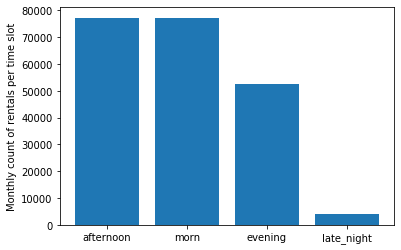

In [55]:
#Bar chart for the 4 time categories
df.time_slot= pd.Categorical(df.time_slot, categories=['morn', 'afternoon', 'evening', 'late_night' ], ordered=True)

time_cat = df.time_slot.value_counts()
plt.bar(time_cat.index, time_cat)
plt.ylabel('Monthly count of rentals per time slot');

We can now look at the average duration of a trip, firstly by looking at the statistics and then creating visuals.  As the duration is a continuous quantitative variable it makes sense to use a histogram.

In [27]:
#Looking at the statistics of the duration in minutes variable we see that the spread is wide due to outliers above
#the 75% quartile.
df.duration_min.describe()

count    210563.000000
mean         13.891912
std          32.137063
min           1.016667
25%           6.266667
50%           9.883333
75%          15.233333
max        1424.866667
Name: duration_min, dtype: float64

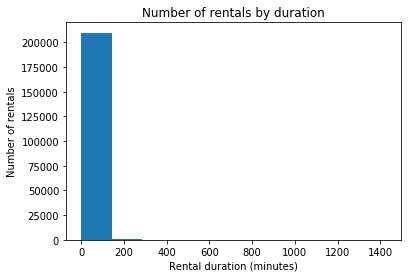

In [28]:
#Plotting a basic histogram provides very little detail with the majority of the data lumped into the first bin.
plt.hist(df.duration_min)
plt.ylabel('Number of rentals')
plt.xlabel('Rental duration (minutes)')
plt.title('Number of rentals by duration');

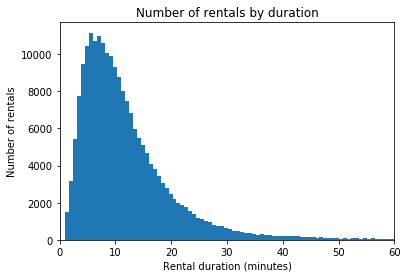

In [29]:
#By increasing the number of bins and setting an xlim() a lot more detail comes to light.
plt.hist(df.duration_min, bins = 2000)
plt.xlim(0,60)
plt.ylabel('Number of rentals')
plt.xlabel('Rental duration (minutes)')
plt.title('Number of rentals by duration');

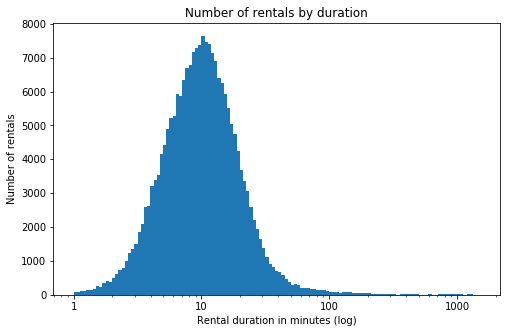

In [30]:
#As this is a continuous variable, right skewed and has a long tail, we can do a log transformation to explore for 
#additional trends.
step = .025
bins = 10 ** np.arange(0, np.log10(df.duration_min.max())+step, step)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.ylabel('Number of rentals')
plt.xlabel('Rental duration in minutes (log)')
plt.title('Number of rentals by duration')
plt.xticks([1,10e0, 10e1, 10e2], ['1', '10', '100', '1000'])
plt.show();

The duration of rentals has a spread from 1 minute to 1,424 minutes.  As seen in the first chart, these outliers make a standard histogram to have little meaning.  Implementing xlim() and, alternatively, looking at the logarithmic transformation we clearly see that the ride durations are distributed around 10 minutes which compares nicely to the mean of 9.8.

Now we move on to looking at the users from both an absolute and relative point of view.

In [31]:
#Looking at the value counts it is quickly apparent that the users are mostly subscribers.
df.user_type.value_counts()

Subscriber    164928
Customer       45635
Name: user_type, dtype: int64

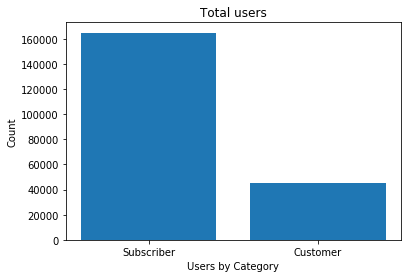

In [32]:
#We plot a bar chart as this variable is categorical.  We visually see the different in absolute numbers of the
#users.
users = df.user_type.value_counts()
plt.bar(users.index, users )
plt.ylabel('Count')
plt.xlabel('Users by Category')
plt.title('Total users');

In [33]:
#Calculating proportions to use for visualization in a pie chart.
sub_prop = df.query('user_type == "Subscriber"').user_type.count()/df.shape[0]
cust_prop = df.query('user_type == "Customer"').user_type.count()/df.shape[0]
sub_prop, cust_prop

(0.783271514938522, 0.21672848506147804)

In [34]:
#Creating an array to use for the pie chart data.
users = np.array([sub_prop, cust_prop])
users

array([0.78327151, 0.21672849])

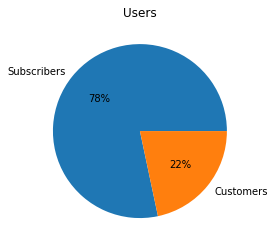

In [35]:
#Creating the pie chart, adding the percentages for clarity of the difference.
plt.pie(users, labels = ['Subscribers', 'Customers'], autopct='%1.f%%')
plt.title('Users');

The users consist of two kinds: subscriber and customers. The subscribers are the bulk user with 78% of the rentals coming from this group.

In [36]:
df_sub = df.query('user_type == "Subscriber"')
df_cust = df.query('user_type == "Customer"')

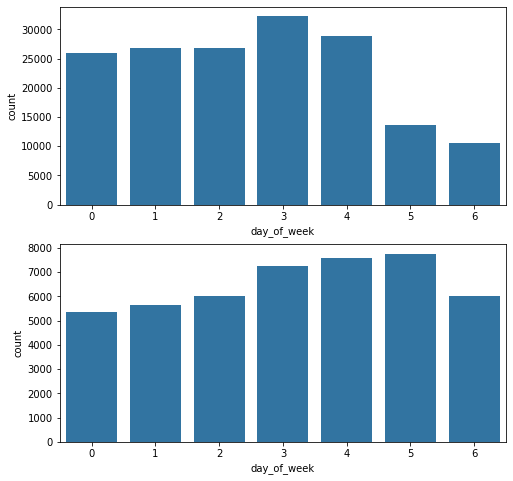

In [37]:
#Day of week and customer
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, x = 'day_of_week', color = base_color, ax = ax[0])
sb.countplot(data = df_cust, x = 'day_of_week', color = base_color, ax = ax[1] )

plt.show()

In [38]:
df.distance.mean()

1.6739984457423

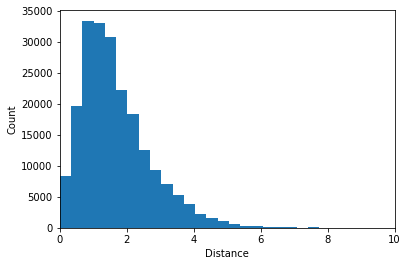

In [39]:
plt.hist(data = df, x = 'distance', bins = 200)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.xlim(0,10);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

Digging deeper into ride duration we are interested to see the duration of rides per day of the week. We start by looking at the value counts and the quartiles to understand the spread of the duration data.

In [40]:
df.duration_min.value_counts()

5.050000      296
7.383333      294
6.166667      293
5.916667      291
5.350000      287
             ... 
179.966667      1
47.650000       1
88.300000       1
178.383333      1
96.083333       1
Name: duration_min, Length: 5611, dtype: int64

In [41]:
#We see that 95% of the data is within a 30minute duration.
df.duration_min.quantile(q = .98)

45.6

In [42]:
df.day_of_week.value_counts()

3    39472
4    36420
2    32879
1    32529
0    31353
5    21365
6    16545
Name: day_of_week, dtype: int64

In [43]:
#98% of the data falls within 30 minutes or less. We create a smaller df that doesn't include outliers. 
df_no_outliers = df.query('duration_min < 46')

In [44]:
#df.day_of_week= pd.Categorical(df.day_of_week, categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
#plt.scatter(data = df_no_outliers, x = 'day_of_week', y = 'duration_min', alpha = .04);

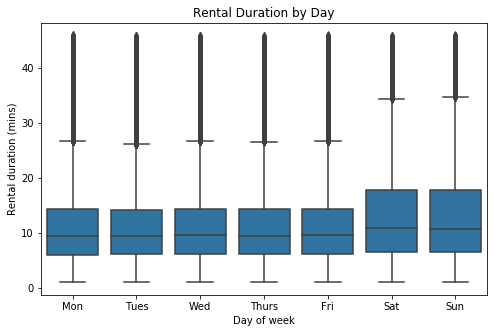

In [63]:
#We use the box plot as the variables being analyzed are quantitative (duration) versus qualitative (user). 
#The box chart is also good for explanatory analysis.
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_no_outliers, x = 'day_of_week', y = 'duration_min', color = base_color)
plt.xlabel('Day of week')
plt.ylabel('Rental duration (mins)')
plt.title('Rental Duration by Day')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

We see that the rental duration is longer on weekend in comparison to the rest of the week. In fact, there appears to be two clusters - the week days are very similar and the weekend days are very similar.

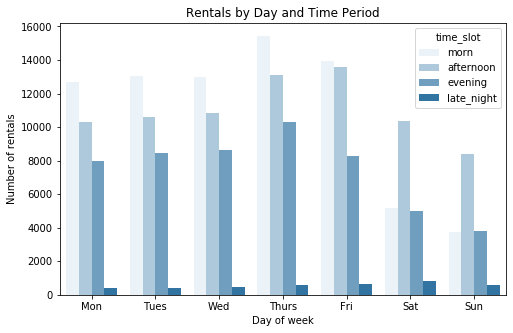

In [64]:
#Day and Time of Day
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day_of_week', hue = 'time_slot', color = base_color);
plt.xlabel('Day of week')
plt.ylabel('Number of rentals')
plt.title('Rentals by Day and Time Period')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

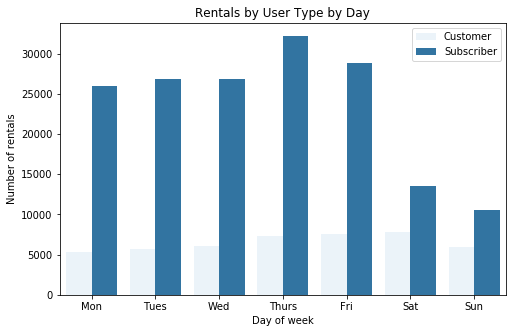

In [76]:
#Users and Day of Week
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type', color = base_color);
plt.xlabel('Day of week')
plt.ylabel('Number of rentals')
plt.title('Rentals by User Type by Day')
plt.legend(['Customer','Subscriber'])
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

These are total numbers.  The trend to see is that the subscriber use drops significantly on the weekend while the customer use increases to its highest point on Saturday.

We will now look at the duration by the type of users to see if customers and subscribers rent in a similar or different fashion.

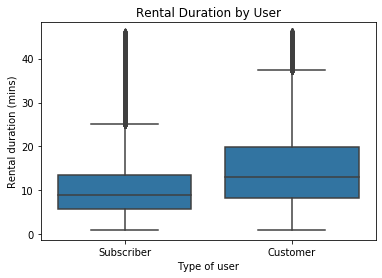

In [46]:
#Using a box plt
sb.boxplot(data = df_no_outliers, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('Type of user')
plt.ylabel('Rental duration (mins)')
plt.title('Rental Duration by User');

The box plot is informative and shows us that customers rent for a longer period of time.  However, to understand the distribution we look at a violin plot.

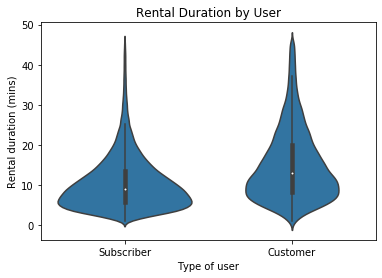

In [47]:
sb.violinplot(data = df_no_outliers, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('Type of user')
plt.ylabel('Rental duration (mins)')
plt.title('Rental Duration by User');

Subscribers used the bikes more often and for shorter durations of time.  Whereas a customer appears to rent a bike more for longer trips which can be seen in the violin plot's distribution tails.

Reflecting back on the pie chart in the univariate section, we recall that subscribers made up 78% of the user base. When looking at the distrubtion we see that the majority of these trips are 5 minutes in duration.  

In [48]:
df.sort_values(by='distance').tail()

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
184914,8967,149.450000,2019-08-05 09:50:29.207,2019-08-05 12:19:56.392,morn,0,230,14th St at Mandela Pkwy,37.810743,-122.291415,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1580,Subscriber,No,10.326583
169042,2554,42.566667,2019-08-07 14:11:05.196,2019-08-07 14:53:40.162,afternoon,2,231,14th St at Filbert St,37.808750,-122.283282,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1804,Subscriber,No,11.332203
169080,4141,69.016667,2019-08-07 13:34:20.528,2019-08-07 14:43:22.427,afternoon,2,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,171,Rockridge BART Station,37.844279,-122.251900,2072,Customer,No,15.691964
153914,81623,1360.383333,2019-08-08 16:11:43.306,2019-08-09 14:52:07.181,afternoon,3,269,Telegraph Ave at Carleton St,37.862320,-122.258801,344,16th St Depot,37.766349,-122.396292,3527,Customer,No,16.106757
34692,5986,99.766667,2019-08-27 06:32:46.668,2019-08-27 08:12:33.077,morn,1,305,Ryland Park,37.342725,-121.895617,72,Page St at Scott St,37.772406,-122.435650,9244,Subscriber,No,67.402478


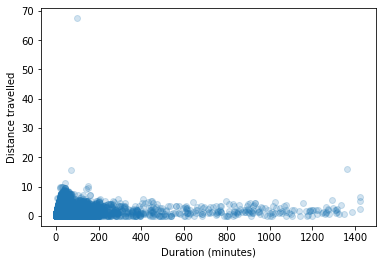

In [49]:
#Using original df
plt.scatter(data = df, x = 'duration_min', y = 'distance', alpha = .2)
plt.ylabel('Distance travelled')
plt.xlabel('Duration (minutes)')
plt.show()

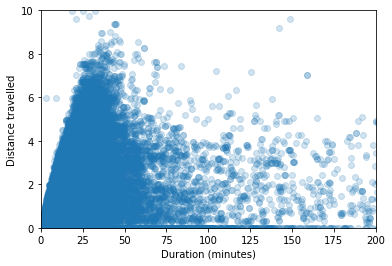

In [50]:
#Original df
plt.scatter(data = df, x = 'duration_min', y = 'distance', alpha = .2)
plt.ylabel('Distance travelled')
plt.xlabel('Duration (minutes)')
plt.ylim(0,10)
plt.xlim(0,200);

In [51]:
df.distance.describe()

count    210563.000000
mean          1.673998
std           1.059922
min           0.000000
25%           0.930881
50%           1.444599
75%           2.188723
max          67.402478
Name: distance, dtype: float64

Keep in mind this shows distance between stations so is the minimum distance travelled.  There is also a distance of 0 for users that returned the bike to the same station.

Shorter periods of time, people go further.

The mean distance is 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

In [52]:
df.head()

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,afternoon,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,evening,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000


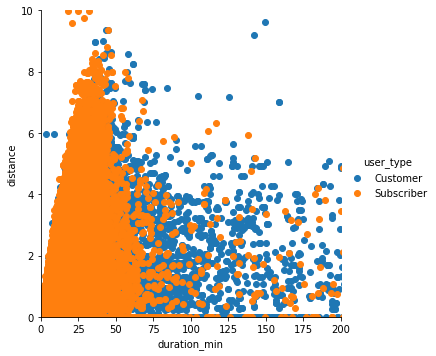

In [110]:
#Original df
g = sb.FacetGrid(data = df, hue = 'user_type', height = 5)
g.map(plt.scatter,'duration_min', 'distance')
plt.ylim(0,10)
plt.xlim(0,200)
g.add_legend();

Builds upon the charts we saw in the earlier sections...
Subscribers 

In [125]:
df.head(5)

,duration_sec,duration_min,start_time,end_time,time_slot,day_of_week,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance
0,68145,1135.750000,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,evening,5,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No,1.517270
1,53216,886.933333,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No,1.478463
2,53182,886.366667,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,evening,5,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No,1.478463
3,75682,1261.366667,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,afternoon,5,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No,0.601439
4,30849,514.150000,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,evening,5,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No,0.000000


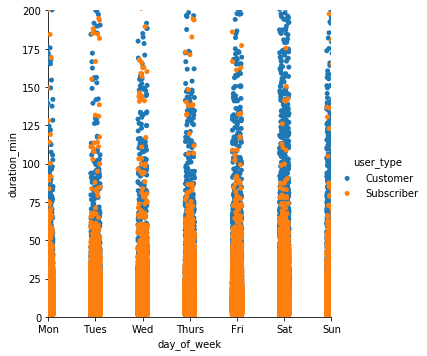

In [124]:
g = sb.FacetGrid(data = df, hue = 'user_type', height = 5)
g.map(sb.stripplot,'day_of_week', 'duration_min', jitter = True, dodge = True)
plt.xlim(0,6)
plt.ylim(0,200)
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);
g.add_legend();

<Figure size 576x432 with 0 Axes>

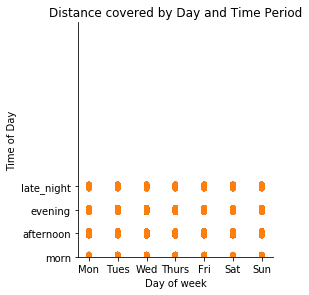

In [113]:
#Day, Time of Day, Distance (Size)
fig = plt.figure(figsize = [8,6])

g = sb.FacetGrid(data = df, hue = 'user_type', height = 4, aspect = 1)
g.map(sb.stripplot,'day_of_week', 'time_slot', jitter = True, dodge = True)
#g.add_legend(title = None)

plt.ylim(0,10)
plt.xlabel('Day of week')
plt.ylabel('Time of Day')
plt.title('Distance covered by Day and Time Period')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!